##Import libraries

In [1]:
# import main libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
# import seaborn as sns

In [2]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# stats
from scipy import stats
#scaling, normalization
from sklearn.preprocessing import StandardScaler
# train, test, split
from sklearn.model_selection import train_test_split
# metrics
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)

# scikit-plot
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Mount Google Drive

In [5]:
# mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Import datasets

In [6]:
# import dataframe (without outliers)
df = pd.read_excel("drive/MyDrive/Progetto Data Mining 1/Data Understanding & Preparation/Data prepared final/df_opt.xlsx", index_col="Unnamed: 0")
df_emph_high = pd.read_excel("drive/MyDrive/Progetto Data Mining 1/Data Understanding & Preparation/Data prepared final/df_opt_emph_high.xlsx", index_col="Unnamed: 0")
df_emph_low = pd.read_excel("drive/MyDrive/Progetto Data Mining 1/Data Understanding & Preparation/Data prepared final/df_opt_emph_low.xlsx", index_col="Unnamed: 0")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2452 entries, 0 to 2451
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vocal_channel        2452 non-null   object 
 1   emotion              2452 non-null   object 
 2   emotional_intensity  2452 non-null   object 
 3   statement            2452 non-null   object 
 4   repetition           2452 non-null   object 
 5   actor                2452 non-null   int64  
 6   sex                  2452 non-null   object 
 7   channels             2452 non-null   int64  
 8   length_ms            2452 non-null   float64
 9   intensity            2452 non-null   float64
 10  zero_crossings_sum   2452 non-null   float64
 11  mfcc_mean            2452 non-null   float64
 12  mfcc_max             2452 non-null   float64
 13  sc_mean              2452 non-null   float64
 14  sc_std               2452 non-null   float64
 15  sc_min               2452 non-null   f

In [8]:
df.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,channels,length_ms,intensity,...,sc_kur,stft_mean,stft_std,stft_min,stft_kur,mean,kur,skew,loudness,emotion_type
0,speech,fearful,normal,Dogs are sitting by the door,2nd,2,F,1,3737.0,-36.793432,...,-1.120769,0.415250,0.335533,0.0,-1.215025,3.844916e-07,9.406061,0.273153,low,strong
1,speech,angry,normal,Dogs are sitting by the door,1st,16,F,1,3904.0,-41.412509,...,-1.531204,0.417488,0.352380,0.0,-1.384174,-7.149491e-08,19.564187,0.292157,low,strong
2,speech,happy,strong,Dogs are sitting by the door,2nd,16,F,1,4671.0,-32.290737,...,-1.130153,0.379758,0.352270,0.0,-1.242947,2.429985e-06,4.881241,0.302659,high,strong
3,speech,surprised,normal,Kids are talking by the door,1st,14,F,1,3637.0,-49.019839,...,-1.497765,0.407277,0.360552,0.0,-1.445318,2.373929e-07,13.040259,-0.081014,low,strong
4,song,happy,strong,Dogs are sitting by the door,2nd,2,F,1,4404.0,-31.214503,...,-1.167544,0.415974,0.350655,0.0,-1.366742,8.454691e-07,7.485109,0.414872,high,strong


In [9]:
# get data columns
df_data = df.loc[:, "length_ms":"skew"]
df_data_emph_high = df_emph_high.loc[:, "length_ms":"skew"]
df_data_emph_low = df_emph_low.loc[:, "length_ms":"skew"]

# get values from data columns
X = df_data.values
X_emph_high = df_data_emph_high.values
X_emph_low = df_data_emph_low.values

# get emotion lables from each emphasis group
y_emotion = df["emotion"]
y_emotion_emph_high = df_emph_high["emotion"]
y_emotion_emph_low = df_emph_low["emotion"]

# get emotion type from each emphasis group
y_emtype = df["emotion_type"]
y_emtype_emph_high = df_emph_high["emotion_type"]
y_emtype_emph_low = df_emph_low["emotion_type"]
df.columns

Index(['vocal_channel', 'emotion', 'emotional_intensity', 'statement',
       'repetition', 'actor', 'sex', 'channels', 'length_ms', 'intensity',
       'zero_crossings_sum', 'mfcc_mean', 'mfcc_max', 'sc_mean', 'sc_std',
       'sc_min', 'sc_max', 'sc_kur', 'stft_mean', 'stft_std', 'stft_min',
       'stft_kur', 'mean', 'kur', 'skew', 'loudness', 'emotion_type'],
      dtype='object')

## Pattern mining preprocessing

In [10]:
df_new = pd.DataFrame()
df_new['emotion'] = df['emotion']
#df_new['emotion_type'] = df['emotion_type']
colonne = ['length_ms', 'intensity','zero_crossings_sum','mfcc_mean','mfcc_max','sc_std','stft_mean','kur']
for colonna in colonne:
  df_new[colonna] = pd.qcut(df[colonna], 10)
  df_new[colonna] = df_new[colonna].astype(str) +'_'+ colonna

#df["EmTypeBin"] = pd.qcut(df["emotion_type"], 4)

#df.drop(["intensity"], axis=1, inplace=True)

In [11]:
df_new.head()

,emotion,length_ms,intensity,zero_crossings_sum,mfcc_mean,mfcc_max,sc_std,stft_mean,kur
0,fearful,"(3670.0, 3804.0]_length_ms","(-38.546, -36.514]_intensity","(15603.6, 17250.4]_zero_crossings_sum","(-34.597, -32.586]_mfcc_mean","(163.117, 174.889]_mfcc_max","(3297.261, 3435.88]_sc_std","(0.403, 0.429]_stft_mean","(8.531, 9.763]_kur"
1,angry,"(3804.0, 4004.0]_length_ms","(-41.943, -38.546]_intensity","(13188.6, 14302.3]_zero_crossings_sum","(-29.861, -28.681]_mfcc_mean","(201.697, 207.613]_mfcc_max","(3851.173, 4065.778]_sc_std","(0.403, 0.429]_stft_mean","(17.407, 25.373]_kur"
2,happy,"(4638.0, 4872.0]_length_ms","(-33.409, -31.817]_intensity","(17250.4, 21832.0]_zero_crossings_sum","(-31.159, -29.861]_mfcc_mean","(163.117, 174.889]_mfcc_max","(3297.261, 3435.88]_sc_std","(0.372, 0.403]_stft_mean","(4.686, 5.917]_kur"
3,surprised,"(3537.0, 3670.0]_length_ms","(-57.845, -46.113]_intensity","(11524.4, 12365.5]_zero_crossings_sum","(-41.193, -34.597]_mfcc_mean","(184.944, 194.22]_mfcc_max","(3851.173, 4065.778]_sc_std","(0.403, 0.429]_stft_mean","(12.728, 14.656]_kur"
4,happy,"(4204.0, 4438.0]_length_ms","(-31.817, -28.993]_intensity","(14302.3, 15603.6]_zero_crossings_sum","(-32.586, -31.159]_mfcc_mean","(126.25, 163.117]_mfcc_max","(3435.88, 3564.375]_sc_std","(0.403, 0.429]_stft_mean","(7.154, 8.531]_kur"


In [12]:
df_newval = df_new.values.tolist()

In [13]:
df_new['emotion'].unique()

array(['fearful', 'angry', 'happy', 'surprised', 'neutral', 'calm', 'sad',
       'disgust'], dtype=object)

# Pattern Mining

## Apriori

In [14]:
!pip install pyfim
from fim import apriori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 357 kB 9.8 MB/s 
  Created wheel for pyfim: filename=pyfim-6.28-cp38-cp38-linux_x86_64.whl size=540616 sha256=79bc1fbd26fb703a31ab565b46ceebc6e350058644e5838455b4fbb4105fb48d
  Stored in directory: /root/.cache/pip/wheels/63/55/a8/2c0948641da51af014ab239f1724b573a059005b8a51d282a2
Successfully built pyfim


In [ ]:
help(apriori)

Help on built-in function apriori in module fim:

apriori(...)
    apriori (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
             eval='x', agg='x', thresh=10, prune=None, algo='b', mode='',
             border=None)
    Find frequent item sets with the Apriori algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support of an i

In [ ]:
# frequent itemset >= min_supp
# closed: an itemset is closed if none of its immediate supersets has the same support as the itemset
# maximal: an itemset is maximal frequent if none of its immediate supersets is frequent

### Frequent Itemset

In [15]:
supp = 4  # 20%
zmin = 2  # minimum number of items per item set
df_newval = df_new.values.tolist()
#print(df_newval)
itemsets = apriori(df_newval, target="s", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])

,frequent_itemset,support
0,"((4872.0, 5906.0]_length_ms, calm)",4.037520
1,"((-28.993, -18.184]_intensity, angry)",4.730832
2,"((4065.778, 4819.783]_sc_std, (4720.999, 8631....",4.690049
3,"((1911.507, 2619.455]_sc_std, (-23.339, -16.81...",4.730832
4,"((-23.339, -16.819]_mfcc_mean, angry)",4.934747
5,"((0.591, 0.702]_stft_mean, (2935.999, 3403.0]_...",4.526917
6,"((0.248, 0.372]_stft_mean, (126.25, 163.117]_m...",4.282219


### Closed Itemsets

In [ ]:
supp = 2  # 2%
supp = 4  # 20%
zmin = 2  # minimum number of items per item set

itemsets = apriori(df_newval, target="c", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["closed_itemset", "support"])

,closed_itemset,support
0,"((4872.0, 5906.0]_length_ms, calm)",4.037520
1,"((-28.993, -18.184]_intensity, angry)",4.730832
2,"((4065.778, 4819.783]_sc_std, (4720.999, 8631....",4.690049
3,"((1911.507, 2619.455]_sc_std, (-23.339, -16.81...",4.730832
4,"((-23.339, -16.819]_mfcc_mean, angry)",4.934747
5,"((0.591, 0.702]_stft_mean, (2935.999, 3403.0]_...",4.526917
6,"((0.248, 0.372]_stft_mean, (126.25, 163.117]_m...",4.282219


### Maximal Itemsets

In [ ]:
itemsets = apriori(df_newval, target="m", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["maximal_itemset", "support"])

,maximal_itemset,support
0,"((4872.0, 5906.0]_length_ms, calm)",4.037520
1,"((-28.993, -18.184]_intensity, angry)",4.730832
2,"((4065.778, 4819.783]_sc_std, (4720.999, 8631....",4.690049
3,"((1911.507, 2619.455]_sc_std, (-23.339, -16.81...",4.730832
4,"((-23.339, -16.819]_mfcc_mean, angry)",4.934747
5,"((0.591, 0.702]_stft_mean, (2935.999, 3403.0]_...",4.526917
6,"((0.248, 0.372]_stft_mean, (126.25, 163.117]_m...",4.282219


### Support plots

#### Support vs number of itemsets

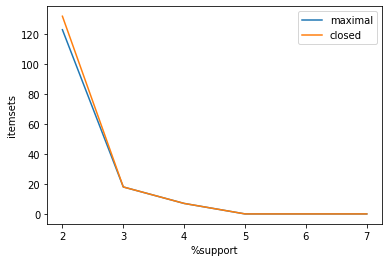

In [24]:
len_max_it = []
len_cl_it = []
max_supp = 8
for i in range(2, max_supp):
    max_itemsets = apriori(df_newval, target="m", supp=i, zmin=zmin)
    cl_itemsets = apriori(df_newval, target="c", supp=i, zmin=zmin)
    len_max_it.append(len(max_itemsets))
    len_cl_it.append(len(cl_itemsets))

plt.plot(np.arange(2, max_supp), len_max_it, label="maximal")
plt.plot(np.arange(2, max_supp), len_cl_it, label="closed")
plt.legend()
plt.xlabel("%support")
plt.ylabel("itemsets")

plt.show()

#### Support vs number of itemset for emotion


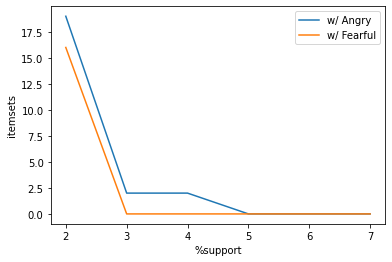

In [ ]:
filter_1 = []
filter_2 = []
for i in range(2, max_supp):
    max_itemsets = apriori(df_newval, target="m", supp=i, zmin=zmin)
    filter_1.append(len([item for item in max_itemsets if "angry" in item[0]]))
    filter_2.append(len([item for item in max_itemsets if "fearful" in item[0]]))

plt.plot(np.arange(2, max_supp), filter_1, label="w/ Angry")
plt.plot(np.arange(2, max_supp), filter_2, label="w/ Fearful")
plt.legend()
plt.xticks()
plt.xlabel("%support")
plt.ylabel("itemsets")

plt.show()

### Rules

In [ ]:
help(apriori)

Help on built-in function apriori in module fim:

apriori(...)
    apriori (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
             eval='x', agg='x', thresh=10, prune=None, algo='b', mode='',
             border=None)
    Find frequent item sets with the Apriori algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support of an i

if the target is association rules:
                a list of rules (i.e. tuples with two or more elements),
                each consisting of a head/consequent item, a tuple with
                a body/antecedent item set, and the values selected by
                the parameter 'report', which may be combined into a
                tuple or a list if report[0] is '(' or '[', respectively.

In [25]:
conf = 25
rules = apriori(df_newval, target="r", supp=supp, zmin=zmin, conf=conf, report="XYCL")
rules_df = pd.DataFrame(
    rules,
    columns=[
        "consequent",
        "antecedent",
        "abs_support",
        "%_support",
        "confidence",
        "lift",
    ],
)
rules_df.sort_values(by="lift", axis=0, ascending=False)

,consequent,antecedent,abs_support,%_support,confidence,lift
8,"(1.7570000000000001, 4.686]_kur","((4872.0, 5906.0]_length_ms, calm)",4.037520,10.032626,54.545455,543.680710
28,"(-23.339, -16.819]_mfcc_mean","((-28.993, -18.184]_intensity, angry)",4.730832,10.032626,49.137931,489.781329
29,"(-28.993, -18.184]_intensity","((-23.339, -16.819]_mfcc_mean, angry)",4.934747,9.991843,47.107438,471.458931
63,"(-23.339, -16.819]_mfcc_mean","((1911.507, 2619.455]_sc_std,)",10.032626,10.032626,47.154472,470.011237
64,"(1911.507, 2619.455]_sc_std","((-23.339, -16.819]_mfcc_mean,)",10.032626,10.032626,47.154472,470.011237
...,...,...,...,...,...,...
92,fearful,"((-31.817, -28.993]_intensity,)",10.032626,15.334421,26.422764,172.310154
43,calm,"((4.686, 5.917]_kur,)",9.991843,15.334421,25.306122,165.028224
89,calm,"((0.248, 0.372]_stft_mean,)",10.032626,15.334421,25.203252,164.357378
81,sad,"((1.7570000000000001, 4.686]_kur,)",10.032626,15.334421,25.203252,164.357378


### Classification

In [ ]:
rules_df[rules_df["consequent"] == "angry"]

,consequent,antecedent,abs_support,%_support,confidence,lift
4,angry,"((-28.993, -18.184]_intensity,)",116,4.730832,0.473469,3.087625
10,angry,"((-23.339, -16.819]_mfcc_mean,)",121,4.934747,0.491870,3.207620


In [ ]:
print("to_predict:", [r for r in rules if r[0] == "angry"][0][0])
print("how?", [r for r in rules if r[0] == "angry"][0][1])

to_predict: angry
how? ('(-28.993, -18.184]_intensity',)


In [ ]:
# left for exercise

# using the same test set for classification (w/ random_state):
# predict the target variable with the most interesting rule:
# .... e.g., the most frequent;
# .... e.g., the one w/ max lift
# build a list of prediction, e.g. ['Survived', 'Not Survived', 'Survived']
# evaluate this prediction with precision/recall/confusion matrix etc.

In [ ]:
len_r = []
min_sup = 1
max_sup = 20
min_conf = 50
max_conf = 90
for i in range(min_sup, max_sup):  # support
    len_r_wrt_i = []
    for j in range(min_conf, max_conf):  # confidence
        rules = apriori(df_newval, target="r", supp=i, zmin=zmin, conf=j, report="aScl")
        len_r_wrt_i.append(len(rules))  # study your characteristics/properties here

    len_r.append(len_r_wrt_i)
len_r = np.array(len_r)

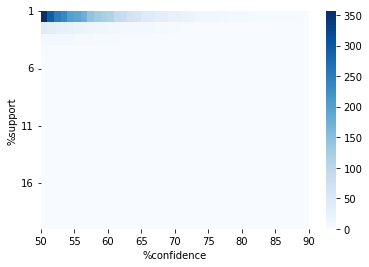

In [ ]:
sns.heatmap(len_r, cmap="Blues", fmt='g')
plt.yticks(np.arange(0, max_sup-min_sup +1, 5), np.arange(min_sup, max_sup+1,5 ))
plt.xticks(np.arange(0, max_conf-min_conf+1, 5), np.arange(min_conf, max_conf+1, 5))
plt.xlabel("%confidence")
plt.ylabel("%support")
plt.show()

## FP-Growth

In [ ]:
from fim import fpgrowth

In [ ]:
help(fpgrowth)

Help on built-in function fpgrowth in module fim:

fpgrowth(...)
    fpgrowth (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
              eval='x', agg='x', thresh=10, prune=Nobe, algo='s', mode='',
              border=None)
    Find frequent item sets with the FP-growth algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support 

In [ ]:
supp = 2  # 2%
supp = 4  # 20%
zmin = 2  # minimum number of items per item set

itemsets = fpgrowth(df_newval, target="s", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])

,frequent_itemset,support
0,"((4065.778, 4819.783]_sc_std, (4720.999, 8631....",4.690049
1,"((126.25, 163.117]_mfcc_max, (0.248, 0.372]_st...",4.282219
2,"((-23.339, -16.819]_mfcc_mean, angry)",4.934747
3,"((-23.339, -16.819]_mfcc_mean, (1911.507, 2619...",4.730832
4,"((0.591, 0.702]_stft_mean, (2935.999, 3403.0]_...",4.526917
5,"((-28.993, -18.184]_intensity, angry)",4.730832
6,"((4872.0, 5906.0]_length_ms, calm)",4.037520


In [ ]:
conf = 65
rules = fpgrowth(df_newval, target="r", supp=supp, zmin=zmin, conf=conf, report="aScl")
pd.DataFrame(
    rules,
    columns=[
        "consequent",
        "antecedent",
        "abs_support",
        "%_support",
        "confidence",
        "lift",
    ],
)

,consequent,antecedent,abs_support,%_support,confidence,lift
0,"(0.248, 0.372]_stft_mean","((-41.193, -34.597]_mfcc_mean, (126.25, 163.11...",46,1.876020,0.686567,6.843344
1,"(-23.339, -16.819]_mfcc_mean","((1911.507, 2619.455]_sc_std, angry)",46,1.876020,0.696970,6.947031
2,"(0.591, 0.702]_stft_mean","((231.156, 268.988]_mfcc_max, (2935.999, 3403....",42,1.712887,0.700000,6.977236
3,"(0.591, 0.702]_stft_mean","((4720.999, 8631.2]_zero_crossings_sum, (231.1...",35,1.427406,0.673077,6.708881
4,"(4872.0, 5906.0]_length_ms","((0.248, 0.372]_stft_mean, calm)",43,1.753670,0.693548,7.115400
5,"(0.248, 0.372]_stft_mean","((4872.0, 5906.0]_length_ms, (126.25, 163.117]...",48,1.957586,0.666667,6.644986
6,"(0.248, 0.372]_stft_mean","((4872.0, 5906.0]_length_ms, (-41.193, -34.597...",39,1.590538,0.764706,7.622190
